In [1]:
import pandas as pd
import numpy as np
import json
from sklearn.model_selection import train_test_split

In [2]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 100) 

In [3]:
label_path = "/Users/yasharora/Downloads/maxtakehome/email_ham_spam.csv"
inbox_path = "/Users/yasharora/Downloads/maxtakehome/email_inbox_data.json"

In [4]:
spam_flag = pd.read_csv(label_path)

In [5]:
#Reading nested json

with open(inbox_path, 'r') as f:
    data = json.load(f)

# Initialize lists to store flattened data
thread_ids = []
message_ids = []
sender_values = []
date_values = []
subject_values = []
reciever_values = []
text_values = []

# Flatten the nested JSON structure
for thread_id, thread_data in data.items():
    for message_id, message_data in thread_data.items():
        thread_ids.append(thread_id)
        message_ids.append(message_id)
        sender_values.append(message_data['sender'])
        date_values.append(message_data['date'])
        subject_values.append(message_data['subject'])
        reciever_values.append(message_data['receiver'])
        text_values.append(message_data['plain_text_body'])

# Create a DataFrame
df = pd.DataFrame({
    'thread_id': thread_ids,
    'message_id': message_ids,
    'sender': sender_values,
    'date': date_values,
    'subject': subject_values,
    'reciever': reciever_values,
    'plane_text_body': text_values,
})


In [6]:
spam_flag.head()

Unnamed: 0         thread_id  is_spam
0           0  18e539bdc6872155        0
1           1  18eaf8220475471a        1
2           2  18e8bc723cd31086        1
3           3  18e20246b9e1ff9d        1
4           4  18ee82b9bec01a2d        0

In [7]:
df.head(5)

thread_id        message_id  \
0  18eee096b201e4b5  18ef0c3d8d5f61ae   
1  18eee096b201e4b5  18eee4dd01a5d191   
2  18eee096b201e4b5  18eee18dac3ed949   
3  18eef5d36cd1a526  18eef5d36cd1a526   
4  18eeeca5919b08e1  18eeeca5919b08e1   

                                              sender  \
0  Tyler Burlison <tyler@tylerburlisonrealestate....   
1     Larry Schneider <larry@jasonmitchellgroup.com>   
2     Larry Schneider <larry@jasonmitchellgroup.com>   
3                        Redfin <redmail@redfin.com>   
4      LinkedIn <notifications-noreply@linkedin.com>   

                        date  \
0  2024-04-18 05:32:18-05:00   
1  2024-04-17 18:04:19-05:00   
2  2024-04-17 17:06:29-05:00   
3  2024-04-18 04:00:46+00:00   
4  2024-04-18 01:20:20+00:00   

                                             subject  \
0                              Re: 16056 Haven Offer   
1                             Fwd: 16056 Haven Offer   
2                                  16056 Haven Offer   
3  Golden Corridor Market Update: $364K average s...   
4  📩 Larry Schneider, you have  a new message and...   

                                            reciever  \
0     Larry Schneider <larry@jasonmitchellgroup.com>   
1                       Tyler.Burlison@exprealty.com   
2  Tyler Burlison <tyler@tylerburlisonrealestate....   
3                       larry@jasonmitchellgroup.com   
4     Larry Schneider <Larry@jasonmitchellgroup.com>   

                                     plane_text_body  
0  Received.  Thank you,  On Wed, Apr 17, 2024 at...  
1  See below,  ---------- Forwarded message -----...  
2  Hi Tyler,   Please see the attached 7.0 Contra...  
3  What you need to know about the market in Gold...  
4  You have 1 new message View messages:https://w...

In [8]:
spam_flag.shape

(1000, 3)

In [9]:
df.shape

(1280, 7)

In [10]:
df["thread_id"].nunique()

1000

#### Data Quality checks

In [11]:
#Cross checking all the thread id in both dataframe matches
count = 0
for thr_id in df["thread_id"].unique():
    if thr_id not in spam_flag["thread_id"].unique():
        print(thr_id)
        count = count + 1
print(count)

0


Hence no thread id is missing amongst 2 dataset

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1280 entries, 0 to 1279
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   thread_id        1280 non-null   object
 1   message_id       1280 non-null   object
 2   sender           1280 non-null   object
 3   date             1280 non-null   object
 4   subject          1280 non-null   object
 5   reciever         1280 non-null   object
 6   plane_text_body  1280 non-null   object
dtypes: object(7)
memory usage: 70.1+ KB


In [17]:
spam_flag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   thread_id   1000 non-null   object
 2   is_spam     1000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 23.6+ KB


No missing values in the data

#### Datatype conversion

In [18]:
df.dtypes

thread_id          object
message_id         object
sender             object
date               object
subject            object
reciever           object
plane_text_body    object
dtype: object

In [19]:
df["sender"] = df["sender"].astype("str")
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')
df["subject"] = df["subject"].astype("str")
df["reciever"] = df["reciever"].astype("str")
df["plane_text_body"] = df["plane_text_body"].astype("str")

In [20]:
#Merging both datasets

merged_df = pd.merge(df, spam_flag[["thread_id","is_spam"]], on = "thread_id", how = "left")

In [21]:
merged_df.head(2)

thread_id        message_id  \
0  18eee096b201e4b5  18ef0c3d8d5f61ae   
1  18eee096b201e4b5  18eee4dd01a5d191   

                                              sender  \
0  Tyler Burlison <tyler@tylerburlisonrealestate....   
1     Larry Schneider <larry@jasonmitchellgroup.com>   

                        date                 subject  \
0  2024-04-18 05:32:18-05:00   Re: 16056 Haven Offer   
1  2024-04-17 18:04:19-05:00  Fwd: 16056 Haven Offer   

                                         reciever  \
0  Larry Schneider <larry@jasonmitchellgroup.com>   
1                    Tyler.Burlison@exprealty.com   

                                     plane_text_body  is_spam  
0  Received.  Thank you,  On Wed, Apr 17, 2024 at...        0  
1  See below,  ---------- Forwarded message -----...        0

In [22]:
#Creating a unique key for the dataset (combination of thread_id and message_id)

merged_df["key"] = [x+"_" + y for (x,y) in zip(merged_df["thread_id"], merged_df["message_id"])]

Assignment Q1
1. Conduct exploratory analysis on this inbox and answer the following questions: </br>
    a. What’s your observation regarding the number of emails per thread? </br>
    b. What’s your observation regarding the duration of the email thread? </br>
    c. Any additional observations you’d like to share? </br>

Ananlyzing number of emails per thread

In [23]:
grouped = merged_df.groupby("thread_id",).size().reset_index(name = "num_of_email")

In [24]:
merged_df = pd.merge(merged_df, grouped, on = "thread_id", how = "left")

In [40]:
#Mean number of emails in a thread
grouped["num_of_email"].mean()

1.28

In [41]:
#Median number of emails in a thread
grouped["num_of_email"].median()

1.0

In [27]:
grouped["num_of_email"].value_counts()

1     896
2      39
3      26
4      16
7       5
5       5
9       4
6       4
8       3
10      2
Name: num_of_email, dtype: int64

- Majority of them have only 1 message. Number of thread decreases, as we increase the number count

Analyzing the duration of mail thread

In [28]:
grouped_df = merged_df.groupby('thread_id')['date'].agg(['min', 'max']).reset_index()
grouped_df['time_difference'] = grouped_df['max'] - grouped_df['min']

In [29]:
#Checking for the group with multiple emails in a thread, since for a single email, the time diff will be 0

In [30]:
#Mean time difference of threads with more than 1 mail
grouped_df[grouped_df["time_difference"] != "0 days 00:00:00"]["time_difference"].mean()

Timedelta('1 days 22:51:59.932692307')

In [31]:
#Median time difference of threads with more than 1 mail
grouped_df[grouped_df["time_difference"] != "0 days 00:00:00"]["time_difference"].median()

Timedelta('0 days 04:12:58')

In [32]:
#Min time difference of threads with more than 1 mail
grouped_df[grouped_df["time_difference"] != "0 days 00:00:00"]["time_difference"].min()

Timedelta('0 days 00:00:58')

In [34]:
# Digging deeper into this case

In [35]:
grouped_df[grouped_df["time_difference"] == grouped_df[grouped_df["time_difference"] != "0 days 00:00:00"]["time_difference"].min()]

thread_id                        min                        max  \
172  18d7ebafbb25a31c  2024-02-06 14:03:19+00:00  2024-02-06 14:04:17+00:00   

    time_difference  
172 0 days 00:00:58

In [37]:
merged_df[merged_df["thread_id"] == "18d7ebafbb25a31c"]

thread_id        message_id  \
1070  18d7ebafbb25a31c  18d7ebbe16d90faf   
1071  18d7ebafbb25a31c  18d7ebafbb25a31c   

                                             sender  \
1070  Agent Designations <info@crendesignation.com>   
1071  Agent Designations <info@crendesignation.com>   

                           date  \
1070  2024-02-06 14:04:17+00:00   
1071  2024-02-06 14:03:19+00:00   

                                                subject  \
1070  Jason Mitchell Real Estate IL Agents: Two Amaz...   
1071  Jason Mitchell Real Estate IL Agents: Two Amaz...   

                                            reciever  \
1070  Larry Schneider <larry@jasonmitchellgroup.com>   
1071  Larry Schneider <larry@jasonmitchellgroup.com>   

                                        plane_text_body  is_spam  \
1070  ( https://www.clpdesignation.com/clp-ceba )  (...        1   
1071  ( https://www.clpdesignation.com/clp-ceba )  (...        1   

                                    key  num_of_email  
1070  18d7ebafbb25a31c_18d7ebbe16d90faf             2  
1071  18d7ebafbb25a31c_18d7ebafbb25a31c             2

In [38]:
merged_df[merged_df["thread_id"] == "18d7ebafbb25a31c"]["plane_text_body"][1070]

'( https://www.clpdesignation.com/clp-ceba )  ( https://www.clpdesignation.com/clp-ceba )  ( https://www.clpdesignation.com/clp-ceba )  Privacy Policy and Terms of Service  Agent Designations  3 Greenway Plaza , Houston , TX 77046  Unsubscribe ( http://url7611.crendesignation.com/wf/unsubscribe?upn=6vnk8BRmTfM2yoskaftEFBVB3GZxBrU33jZoOqQ5x6PmPQWgQXgDwmQxcB6fldmjPXLhCecV34cXyVzpE5PM-2FYR2gbRlsZaqm7WnQKQNgevuhHFnEEfnbBkWYg9HNIfg3AFLfsHLH0Pn0JHyYpz14T5jkEH9NMuwtG36g13a3Lg5QJAHzQ4hGsxzs6dIift-2BiZ-2F6Cr1Rk2w6RoHl1L902VmGuJsELzmTY8cf7tx0ld7JuVayaXJXsguf3lFgDz1Idlt4dTjqzvW6ogdsPkYsJB7SmWlXfWxasNJ2xmbkBismg5N10JAg-2BTwl5estvuo3y5LGSPNcfXFglIv8FD5cR6cBz9sZWVeSvgjR5znqNV23Gfy-2Fz1Edrm-2Bzycvc3H2IE7lYORo5PQJRLnIIkXN6TJ0wOTck52N1cqW0WmwKdY2o6r1S8smrghitgQRXAQA3wMP5DpgDxKcWCX94JYyOXNta-2FlIW-2BsvF0GEZ2rbJ4IHnOOOMd8ytCqkPzE1C3Ir9jv600i7gainnq27hbRF2BBmnSypRqDD1-2BYT3o6vFkO2QQiD2jq0bwI2z3Y3cFgDsBw1HgI3fIb-2Fyh4nXeyPCdztuoZg7A9UC-2B8glIrxX-2FA2nuYNB1O0rYcGlBlC-2BLBqH9bq9gFTrqsHkXAtBrudbVpo6maRmb3BUf8

In [39]:
merged_df[merged_df["thread_id"] == "18d7ebafbb25a31c"]["plane_text_body"][1071]

'( https://www.clpdesignation.com/clp-ceba )  ( https://www.clpdesignation.com/clp-ceba )  ( https://www.clpdesignation.com/clp-ceba )  Privacy Policy and Terms of Service  Agent Designations  3 Greenway Plaza , Houston , TX 77046  Unsubscribe ( http://url7611.crendesignation.com/wf/unsubscribe?upn=6vnk8BRmTfM2yoskaftEFBVB3GZxBrU33jZoOqQ5x6PmPQWgQXgDwmQxcB6fldmjPXLhCecV34cXyVzpE5PM-2FYR2gbRlsZaqm7WnQKQNgevuhHFnEEfnbBkWYg9HNIfg3AFLfsHLH0Pn0JHyYpz14T5jkEH9NMuwtG36g13a3Lh9d87DAnBhXiea4FFPq2eAos-2Bd3wyz1h-2FepGbRsxLIALLxAZyTK6zkPkWAhQbTvpBt9Gs5l7nurejlyF-2F04IrNiq9SykRkEmRhk6A6JTtDHEPBbVLNYoR-2BQXFBH9Z4sCBoiquA9zL2Oo1Q76TKkRrPjQLE4LRwFUhq5w10WkNZ3-2BJOs7251mhR-2BU7BMGuspP6oZlTuUwA6bY7AxmBGU1-2BYPyPd5oFdqKjAGjrvZzwQ9tnkgWR5feL-2BqjqwpIUst-2FLR2QWT-2FTmbUm1-2FIGDZsVhE-2FAfi5GpOAL-2B0d1XGJSQObgE969TgkG9ENANXb43sJZyps0dnpD61vfU5DyOjKxK-2BbRnikmLsSouHbF4tEl-2FdGTjHWMFxT3RyfPSbvNibpxjtXz-2FcazdS1FthGtPp8Abx1H9lx4pFsC9hzjOiNoT3MJ42yfDcOKV-2BjQGbmjkRC-2BUqbVGoc-2FAeSWPkjCoKcC7fhZjxGgRYDJ3dhg5SeInx

- Observation - All the contents and fields are same. The person might have mistakenly shared the same mail twice

In [42]:
grouped_df[grouped_df["time_difference"] != "0 days 00:00:00"]["time_difference"].max()

Timedelta('38 days 19:57:39')

In [43]:
grouped_df[grouped_df["time_difference"] == grouped_df[grouped_df["time_difference"] != "0 days 00:00:00"]["time_difference"].max()]

thread_id                        min                        max  \
315  18dc8c61e3d86514  2024-02-20 17:12:55-06:00  2024-03-30 14:10:34-05:00   

     time_difference  
315 38 days 19:57:39

In [44]:
merged_df[merged_df["thread_id"] == "18dc8c61e3d86514"]

thread_id        message_id  \
304  18dc8c61e3d86514  18e90c55165cbddf   
305  18dc8c61e3d86514  18dc8cb2f9cc74b6   

                                             sender  \
304  Larry Schneider <larry@jasonmitchellgroup.com>   
305  Larry Schneider <larry@jasonmitchellgroup.com>   

                          date                            subject  \
304  2024-03-30 14:10:34-05:00  Re: 1311 Blue Ridge Parkway Offer   
305  2024-02-20 17:12:55-06:00      1311 Blue Ridge Parkway Offer   

              reciever                                    plane_text_body  \
304  c.sifnotis@kw.com  Hi Chris,  I saw that this home was still list...   
305  c.sifnotis@kw.com  Hi Chris,  Attached is my client's offer, appr...   

     is_spam                                key  num_of_email  
304        0  18dc8c61e3d86514_18e90c55165cbddf             2  
305        0  18dc8c61e3d86514_18dc8cb2f9cc74b6             2

In [46]:
merged_df[merged_df["thread_id"] == "18dc8c61e3d86514"]["plane_text_body"][304]

"Hi Chris,  I saw that this home was still listed as under contract.  I know that short sales can take time.  Please keep us in mind if anything changes.    On Tue, Feb 20, 2024 at 5:12\u202fPM Larry Schneider < larry@jasonmitchellgroup.com> wrote:  > Hi Chris, > > Attached is my client's offer, approval letter, addendum and disclosures. > > We understand the situation and are willing to work through the Insurance > claim process and with the Bank on the short sale. > > Please confirm receipt of this email. > > Thank you, > > > > >  -- "

In [47]:
merged_df[merged_df["thread_id"] == "18dc8c61e3d86514"]["plane_text_body"][305]

"Hi Chris,  Attached is my client's offer, approval letter, addendum and disclosures.  We understand the situation and are willing to work through the Insurance claim process and with the Bank on the short sale.  Please confirm receipt of this email.  Thank you, "

- Observation - It can be seen the first conversation is regarding some update on the sale, while the second one is confirmation of the sale. As expected it may have taken some time for the deal to be finalized

In [49]:
merged_df = pd.merge(merged_df, grouped_df[["thread_id","time_difference"]], on = "thread_id", how = "left")

In [50]:
#just checking for the thread with only 1 email, there is no discrepancy in the time
merged_df[merged_df["num_of_email"] == 1]["time_difference"].max()
#as expected

Timedelta('0 days 00:00:00')

#### Additional observations

In [51]:
merged_df["is_spam"].value_counts()

1    819
0    461
Name: is_spam, dtype: int64

- Majority of the emails are spam

In [54]:
merged_df["sender"].value_counts().head(5)

Redfin <listings@redfin.com>                      161
Larry Schneider <larry@jasonmitchellgroup.com>    123
"realtor.com" <consumer@e.mail.realtor.com>       119
connectMLS <no-reply@connectmls.com>               47
Larry Schneider <noreply@skyslope.com>             42
Name: sender, dtype: int64

-- Analyzing the top 5 email senders

In [55]:
merged_df[merged_df["sender"] == "Redfin <listings@redfin.com>"]["is_spam"].value_counts()

1    161
Name: is_spam, dtype: int64

- All are spam from this sender
- Can directly be added as a rule, no need of any ML model in this sender

In [56]:
merged_df[merged_df["sender"] == "Larry Schneider <larry@jasonmitchellgroup.com>"]["is_spam"].value_counts()

0    120
1      3
Name: is_spam, dtype: int64

- Very less propotion of spam from this sender

In [57]:
merged_df[merged_df["sender"] == '"realtor.com" <consumer@e.mail.realtor.com>']["is_spam"].value_counts()

1    119
Name: is_spam, dtype: int64

- All are spam from this sender as well
- Can directly be added as a rule, no need of any ML model in this sender

In [58]:
merged_df[merged_df["sender"] == "connectMLS <no-reply@connectmls.com>"]["is_spam"].value_counts()

1    47
Name: is_spam, dtype: int64

- All are spam from this sender as well
- Can directly be added as a rule, no need of any ML model in this sender

In [59]:
merged_df[merged_df["sender"] == "Larry Schneider <noreply@skyslope.com>"]["is_spam"].value_counts()

0    38
1     4
Name: is_spam, dtype: int64

- Very less propotion of spam from this sender

- Observations

Hence from the above observations, it can be seen that some senders have a very high propotion of spam which intutively makes sense. A saimple rule can be created for such senders <br>

If we wish to do it via a ML model, we can add a feature which is % of spam by reciever in the past, which would be a great aid to our ML model. Will include this step in Feature Engineering

In [61]:
#Range of dataset
print(f"Minimum Date: {merged_df['date'].min()}, Maximum Date: {merged_df['date'].max()}")

Minimum Date: 2024-01-18 19:17:15-05:00, Maximum Date: 2024-04-18 05:32:18-05:00


-- This data is for 3 months starting from 18th Jan 2024 untul 18th Apr 2024

In [62]:
temp = merged_df.copy(deep = True)
temp['month'] = [x.month for x in temp["date"]]
temp['month'].value_counts().sort_index()

1    164
2    350
3    471
4    295
Name: month, dtype: int64

In [63]:
# 14,29,31,19 -> no of days in each month during the time frame
print(164/14)
print(350/29)
print(471/31)
print(295/19)

11.714285714285714
12.068965517241379
15.193548387096774
15.526315789473685


March and April have more number of emails on average

In [64]:
merged_df_spam = merged_df[merged_df["is_spam"] == 1]
merged_df_non_spam = merged_df[merged_df["is_spam"] == 0]

Checking average length of the message for spam and non spam

In [66]:
merged_df_spam['plane_text_body'].apply(lambda x: len(x)).mean()

18804.82905982906

In [67]:
merged_df_spam['plane_text_body'].apply(lambda x: len(x)).median()

4623.0

In [68]:
merged_df_non_spam['plane_text_body'].apply(lambda x: len(x)).mean()

7178.069414316703

In [69]:
merged_df_non_spam['plane_text_body'].apply(lambda x: len(x)).median()

1815.0

On an average, spam mails have more characters than non spam mail

##### Text Preprocessing

In [70]:
import re
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def clean_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, 'html.parser').get_text()
    # Lowercase the text
    text = text.lower()
    # Removing numbers
    text = re.sub(r'\d+', '', text)
    # Removing white spaces, new line character and some extra patterns
    text = text.strip()
    text = text.replace('\n','')
    
    text = re.sub(r'<tr>|</tr>', '', text)
    
    # Remove content of images (assuming image tags are in the format <img ... />)
    text = re.sub(r'<img\s.*?/>', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove punctuation
    tokens = [word for word in tokens if word.isalnum()]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    # Join the tokens back into a single string
    cleaned_text = ' '.join(tokens)
    return cleaned_text

In [71]:
merged_df['cleaned_text'] = merged_df['plane_text_body'].apply(clean_text)

/var/folders/gh/t0gjpp5j3jvcprk5by8l94tc0000gn/T/ipykernel_54544/264427077.py:9: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()


##### Wordcloud

In [72]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()

In [73]:
spam_text = ' '.join(merged_df[merged_df["is_spam"] == 1]["cleaned_text"])
non_spam_text = ' '.join(merged_df[merged_df["is_spam"] == 0]["cleaned_text"])

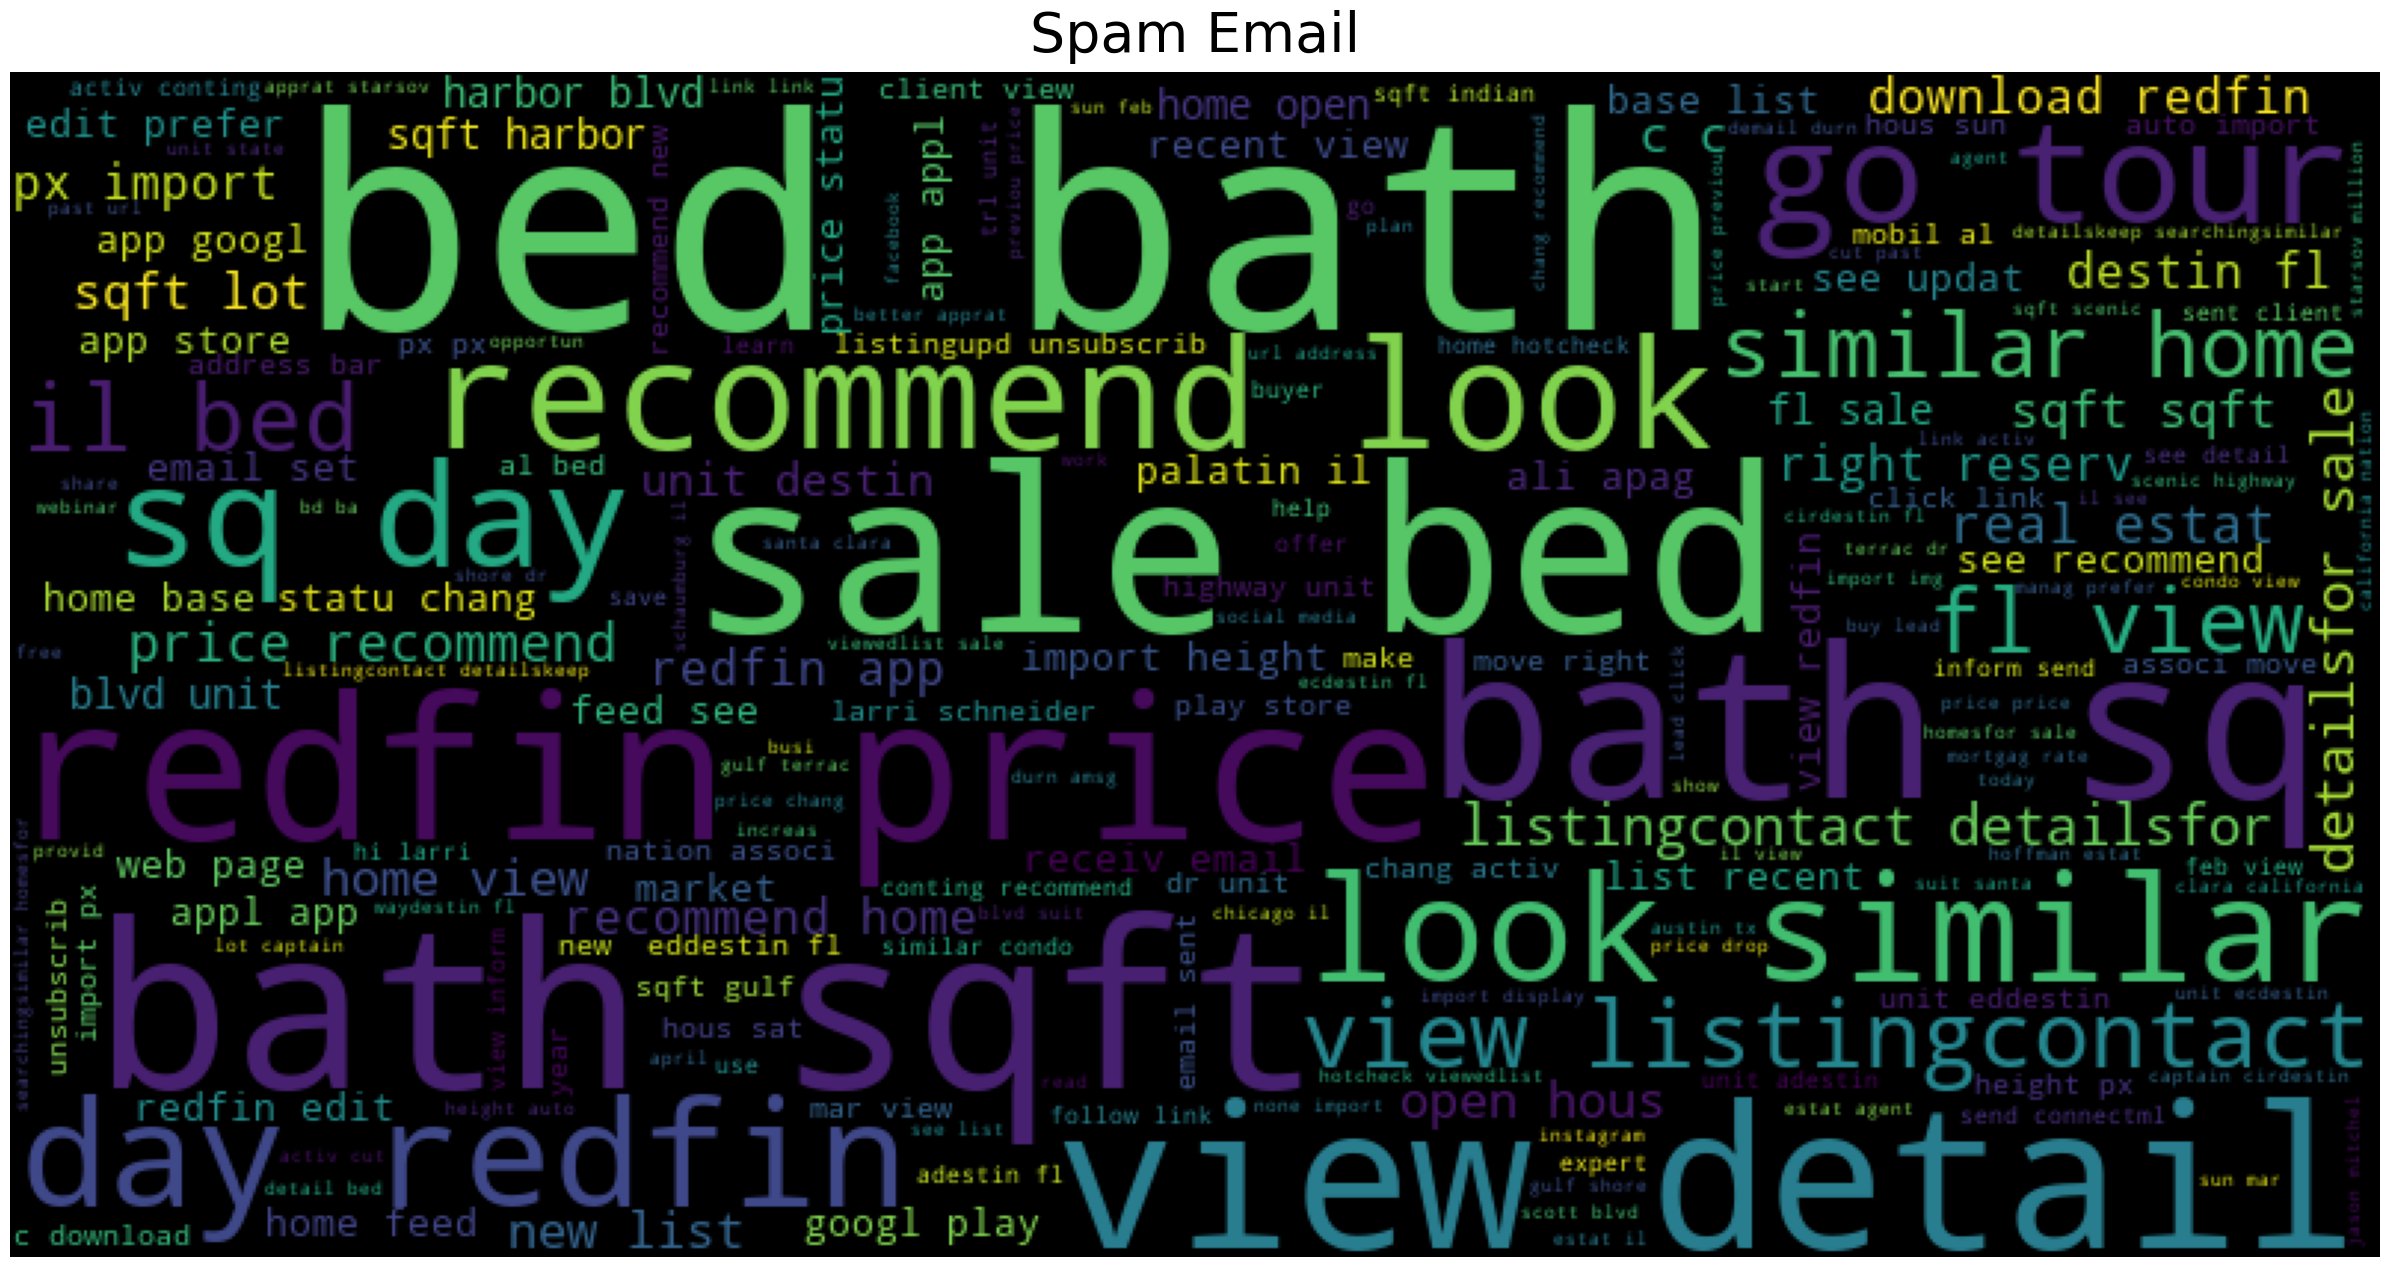

In [74]:
plot_wordcloud(spam_text,title = 'Spam Email')

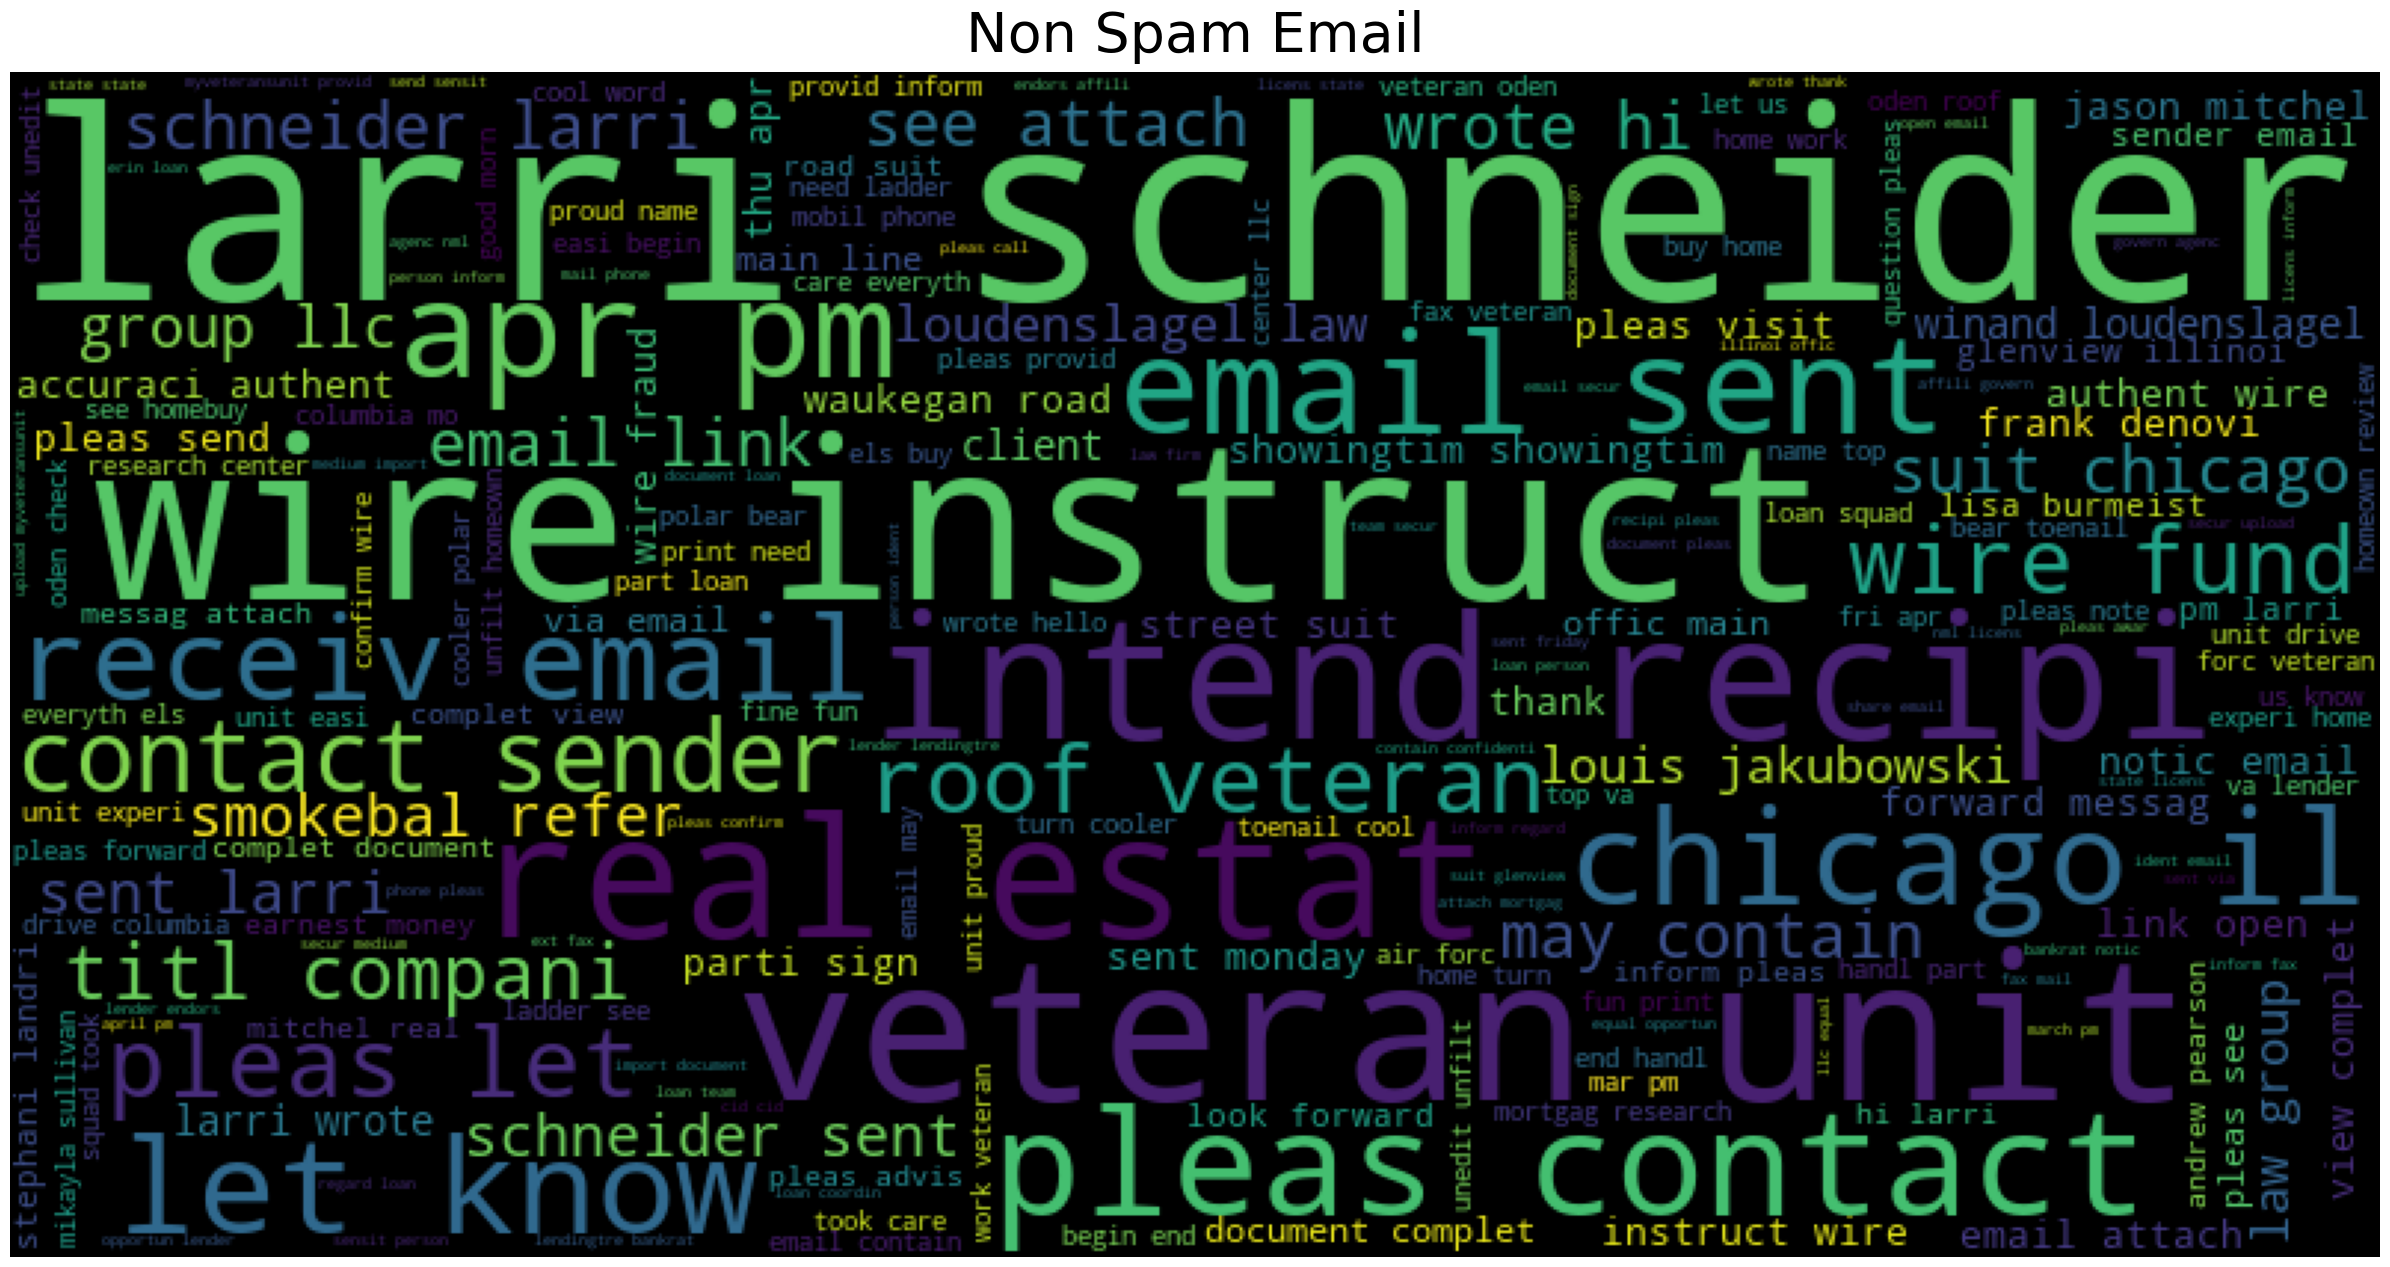

In [75]:
plot_wordcloud(non_spam_text,title = 'Non Spam Email')

In [76]:
from collections import defaultdict
import pandas as pd
import plotly.graph_objs as go
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)

In [77]:
spam_index = merged_df_spam.index
non_spam_index = merged_df_non_spam.index

In [78]:
spam_email = np.array(merged_df["cleaned_text"])[spam_index]
non_spam_email = np.array(merged_df["cleaned_text"])[non_spam_index]

In [79]:
## custom function for ngram generation ##

def generate_ngrams(text, n_gram=3):
    token = [token for token in text.lower().split() if token != ""]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]


## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

In [80]:
def visualize_in_bar_chart(word_count=1):
    ## Get the bar chart from sincere questions ##
    freq_dict = defaultdict(int)
    for sent in non_spam_email:
        for word in generate_ngrams(sent,word_count):
            freq_dict[word] += 1
    fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
    fd_sorted.columns = ["word", "wordcount"]
    trace0 = horizontal_bar_chart(fd_sorted.head(20), 'blue')

    ## Get the bar chart from insincere questions ##
    freq_dict = defaultdict(int)
    for sent in spam_email:
        for word in generate_ngrams(sent,word_count):
            freq_dict[word] += 1
    fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
    fd_sorted.columns = ["word", "wordcount"]
    trace1 = horizontal_bar_chart(fd_sorted.head(20), 'blue')

    # Creating two subplots
    fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                              subplot_titles=["Frequent words of non spam email", 
                                              "Frequent words of spam email"])
    fig.append_trace(trace0, 1, 1)
    fig.append_trace(trace1, 1, 2)
    fig['layout'].update(height=600, width=800, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
    py.iplot(fig, filename='word-plots')

/Users/yasharora/anaconda3/lib/python3.11/site-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



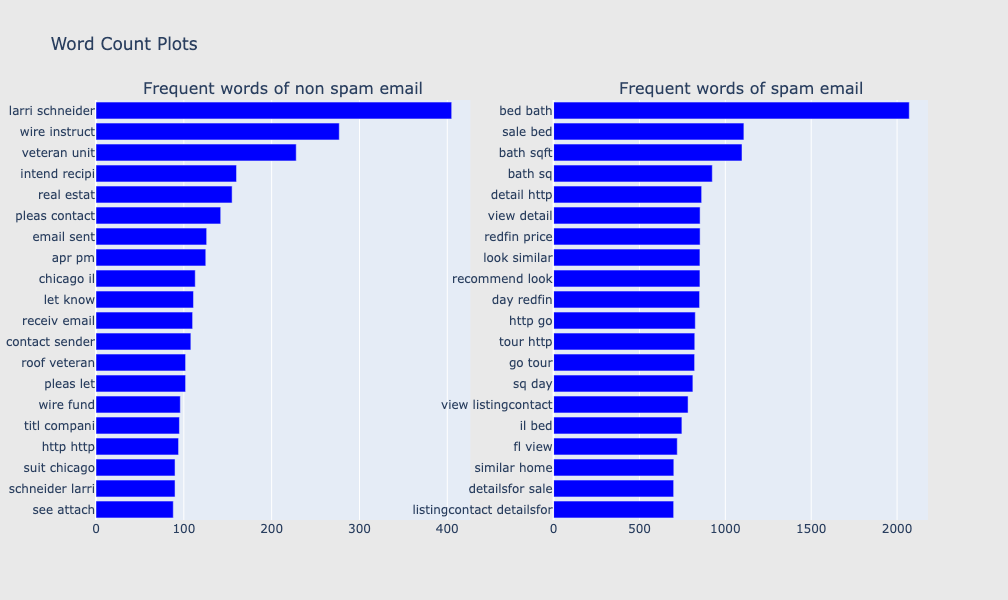

In [81]:
visualize_in_bar_chart(2)

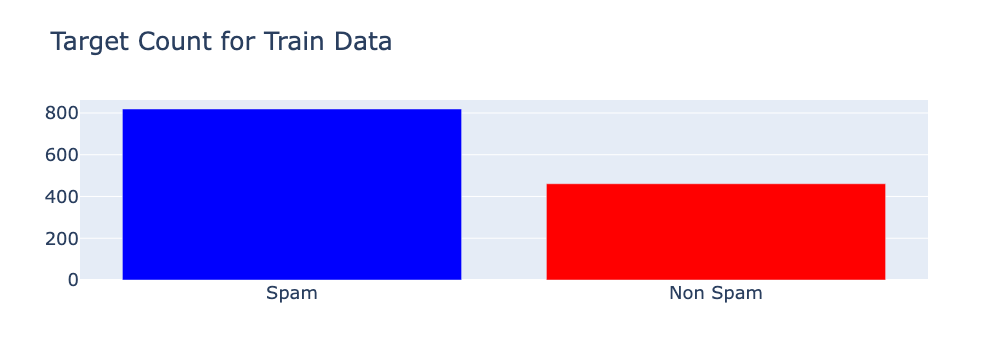

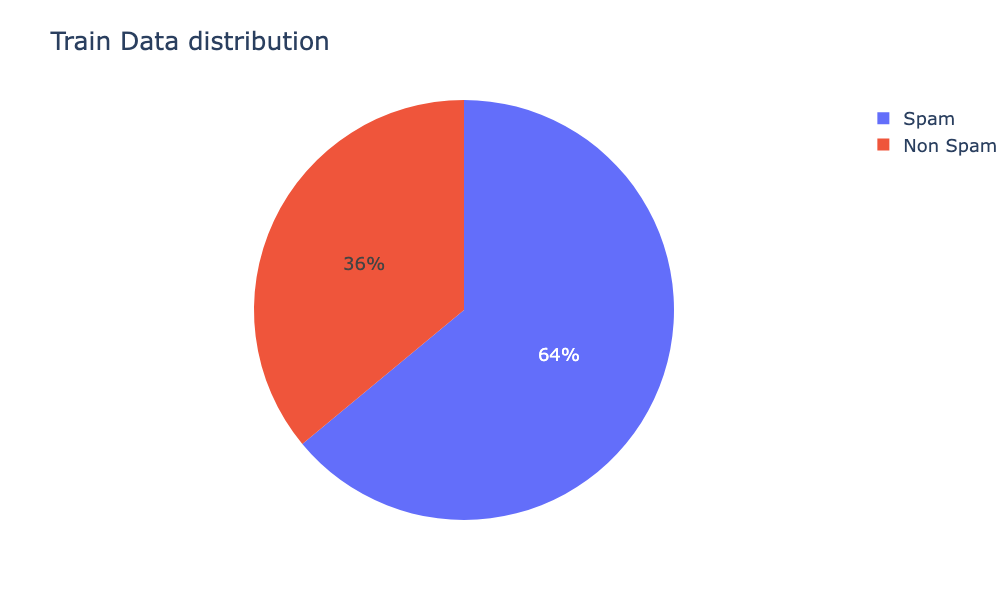

In [83]:
#Plotting the target feature

spam_size = len(spam_index)
non_spam_size = len(non_spam_index)
total_train_size = spam_size + non_spam_size

trace = go.Bar(
    x=["Spam","Non Spam"],
    y=[spam_size, non_spam_size],
    marker=dict(
        color=[spam_size, non_spam_size],
        colorscale = 'Picnic',
        reversescale = True
    ),
)

layout = go.Layout(
    title='Target Count for Train Data',
    font=dict(size=18)
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="TargetCount")

## target distribution ##
labels = (np.array(["Spam", "Non Spam"]))
sizes = (np.array(([spam_size,non_spam_size]))/total_train_size*100)

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Train Data distribution',
    font=dict(size=18),
    width=600,
    height=600,
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="usertype")

Q2 Conduct deeper analysis of this email inbox and answer the following question. State your
assumptions when performing this analysis. </br>
a. How many of these emails are referring to a specific real estate transaction?
State your assumptions </br>
b. Among these emails referring to a specific real estate transaction, what are the
top 3-5 topics? </br>

Assumptions taken
- By transaction, I assume that the means actual buying of properies, the keywords will be restricted to a few (receipt, sale completed, transaction, payment recieved etc)
-  Emails referring to a specific real estate transaction contain certain keywords or phrases related to real estate transactions as mentioned above
- This is the exhaustive list of keywords. There would definitely be a lot more keywords

In [87]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


# Combine mail body and mail subject into a single text column
merged_df['combined_text'] = merged_df['cleaned_text'] + ' ' + merged_df['subject']

# Define keywords related to real estate transactions
real_estate_keywords = [
    "receipt"
    "closing",
    "settlement",
    "transfer of ownership",
    "sale completed",
    "transaction",
    "title transferred",
    "payment received",
    "transaction complete",
    "deal closed",
    "agreement",
    "payment received",
    "received",
    "deal",
    "completed"
]





# Create a function to check if an email contains real estate keywords
def contains_real_estate_keywords(text):
    for keyword in real_estate_keywords:
        if keyword in text.lower():
            return True
    return False

# Apply the function to each email and create a new column indicating whether it refers to a real estate transaction
merged_df['refers_to_real_estate_transaction'] = merged_df['combined_text'].apply(contains_real_estate_keywords)

# Count the number of emails referring to a real estate transaction
num_real_estate_emails = merged_df['refers_to_real_estate_transaction'].sum()
print("Number of emails referring to a specific real estate transaction:", num_real_estate_emails)


Number of emails referring to a specific real estate transaction: 147


In [98]:
# merged_df[(merged_df['refers_to_real_estate_transaction'] == 1) & (merged_df['is_spam'] == 0)]['subject']

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Filter emails referring to a real estate transaction
real_estate_emails = merged_df[(merged_df['refers_to_real_estate_transaction'] == 1) & (merged_df['is_spam'] == 0)]['subject']

# Create a TF-IDF Vectorizer to convert text into TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(real_estate_emails)

# Apply Non-negative Matrix Factorization (NMF) to identify topics
nmf = NMF(n_components=10, random_state=42)
nmf.fit(X)

# Print the top words for each topic
print("Top words for each topic:")
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(nmf.components_):
    top_words_idx = topic.argsort()[:-5:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    print(f"Topic {topic_idx + 1}: {' '.join(top_words)}")


Top words for each topic:
Topic 1: addendum buyers broker agreement
Topic 2: documents sign envelope completed
Topic 3: aproa595127 bma cronin graebel
Topic 4: chicago contracts 877 lansing
Topic 5: 1663 paul ave statement
Topic 6: crystal 4716 trl 60050
Topic 7: form escrow update needs
Topic 8: contract earnest money new
Topic 9: offer envelope completed oak
Topic 10: response letter bob phalen


In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Filter emails referring to a real estate transaction
real_estate_emails = merged_df[(merged_df['refers_to_real_estate_transaction'] == 1) & (merged_df['is_spam'] == 0)]['combined_text']

# Create a TF-IDF Vectorizer to convert text into TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(real_estate_emails)

# Apply Non-negative Matrix Factorization (NMF) to identify topics
nmf = NMF(n_components=10, random_state=42)
nmf.fit(X)

# Print the top words for each topic
print("Top words for each topic:")
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(nmf.components_):
    top_words_idx = topic.argsort()[:-5:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    print(f"Topic {topic_idx + 1}: {' '.join(top_words)}")


Top words for each topic:
Topic 1: document email link complet
Topic 2: graebel properti bma alyssa
Topic 3: buyer domin broker mancini
Topic 4: wyandott mapl michigan needs
Topic 5: max apr jennif divya
Topic 6: earnest offic money method
Topic 7: imag tammi mikayla sullivan
Topic 8: boundrouka bob sharon wire
Topic 9: trl crystal 60050 mchenry
Topic 10: fredi fuent paul cancel


In [102]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Filter emails referring to a real estate transaction
real_estate_emails = merged_df[(merged_df['refers_to_real_estate_transaction'] == 1) & (merged_df['is_spam'] == 0)]['combined_text']

# Create a CountVectorizer to convert text into a matrix of token counts
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(real_estate_emails)

# Apply Latent Dirichlet Allocation (LDA) to identify topics
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(X)

# Print the top words for each topic
print("Top words for each topic:")
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-6:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    print(f"Topic {topic_idx + 1}: {' '.join(top_words)}")


Top words for each topic:
Topic 1: order secur transact mileston click
Topic 2: brittni fitch mary check fwd
Topic 3: apr wrote jennif max kim
Topic 4: imag paul fredi attach real
Topic 5: tammi estat real mikayla sullivan
Topic 6: document email link complet sign
Topic 7: close escrow transact date jmg
Topic 8: pleas graebel properti thank complet
Topic 9: email pleas attach sharon wire
Topic 10: buyer broker form agreement domin


- Another option which I wanted to explore

Deepdive more into data and come up with specific terms of transaction mails. Use those keywords to create a vector using any pretrained embedding (eg Glove) </br>

For all the mails then, cross check the similarity score with the transaction keywords vector and provide a score on how probable it is to be a transaction email

Q3. Modelling approach

#### Feature Engineering

In [104]:
# Creating a whole list of features using the data and knowledge based on literature review

In [106]:
# Thread Attributes
merged_df['thread_unique_senders'] = merged_df.groupby('thread_id')['sender'].transform('nunique')
merged_df['thread_time_diff'] = (merged_df['date'] - merged_df.groupby('thread_id')['date'].transform('min')).dt.total_seconds()

# Sender Features
merged_df['sender_domain'] = merged_df['sender'].str.split('@').str[-1]
merged_df['sender_email_count'] = merged_df.groupby('sender')['message_id'].transform('count')
merged_df['sender_spam_percentage'] = merged_df.groupby('sender')['is_spam'].transform('mean') * 100

# Date Features
merged_df['hour'] = [x.hour for x in merged_df['date']]
#merged_df['day_of_week'] = [x.dayofweek for x in merged_df["date"]]
merged_df['month'] = [x.month for x in merged_df["date"]]

# Subject and Body Features
merged_df['subject_length'] = merged_df['subject'].str.len()
merged_df['body_length'] = merged_df['plane_text_body'].str.len()
merged_df['contains_url'] = merged_df['plane_text_body'].str.contains('http').astype(int)
merged_df['contains_attachment'] = merged_df['plane_text_body'].str.contains('attachment').astype(int)

# Receiver Features
merged_df['receiver_count'] = merged_df['reciever'].str.split(';').str.len()

# Time-Based Features
# merged_df['time_since_previous_email'] = merged_df.groupby('thread_id')['date'].diff().total_seconds()
# merged_df['time_since_first_email'] = (merged_df['date'] - merged_df.groupby('thread_id')['date'].transform('min')).total_seconds()

merged_df['time_since_previous_email'] = merged_df.groupby('thread_id')['date'].diff().dt.total_seconds()

# Calculate time difference since the first email in the thread
merged_df['time_since_first_email'] = (merged_df['date'] - merged_df.groupby('thread_id')['date'].transform('min')).dt.total_seconds()

merged_df.head(5)


thread_id        message_id  \
0  18eee096b201e4b5  18ef0c3d8d5f61ae   
1  18eee096b201e4b5  18eee4dd01a5d191   
2  18eee096b201e4b5  18eee18dac3ed949   
3  18eef5d36cd1a526  18eef5d36cd1a526   
4  18eeeca5919b08e1  18eeeca5919b08e1   

                                              sender  \
0  Tyler Burlison <tyler@tylerburlisonrealestate....   
1     Larry Schneider <larry@jasonmitchellgroup.com>   
2     Larry Schneider <larry@jasonmitchellgroup.com>   
3                        Redfin <redmail@redfin.com>   
4      LinkedIn <notifications-noreply@linkedin.com>   

                        date  \
0  2024-04-18 05:32:18-05:00   
1  2024-04-17 18:04:19-05:00   
2  2024-04-17 17:06:29-05:00   
3  2024-04-18 04:00:46+00:00   
4  2024-04-18 01:20:20+00:00   

                                             subject  \
0                              Re: 16056 Haven Offer   
1                             Fwd: 16056 Haven Offer   
2                                  16056 Haven Offer   
3  Golden Corridor Market Update: $364K average s...   
4  📩 Larry Schneider, you have  a new message and...   

                                            reciever  \
0     Larry Schneider <larry@jasonmitchellgroup.com>   
1                       Tyler.Burlison@exprealty.com   
2  Tyler Burlison <tyler@tylerburlisonrealestate....   
3                       larry@jasonmitchellgroup.com   
4     Larry Schneider <Larry@jasonmitchellgroup.com>   

                                     plane_text_body  is_spam  \
0  Received.  Thank you,  On Wed, Apr 17, 2024 at...        0   
1  See below,  ---------- Forwarded message -----...        0   
2  Hi Tyler,   Please see the attached 7.0 Contra...        0   
3  What you need to know about the market in Gold...        1   
4  You have 1 new message View messages:https://w...        1   

                                 key  num_of_email time_difference  \
0  18eee096b201e4b5_18ef0c3d8d5f61ae             3 0 days 12:25:49   
1  18eee096b201e4b5_18eee4dd01a5d191             3 0 days 12:25:49   
2  18eee096b201e4b5_18eee18dac3ed949             3 0 days 12:25:49   
3  18eef5d36cd1a526_18eef5d36cd1a526             1 0 days 00:00:00   
4  18eeeca5919b08e1_18eeeca5919b08e1             1 0 days 00:00:00   

                                        cleaned_text  \
0  receiv thank wed apr pm larri schneider larri ...   
1  see forward messag larri schneider date wed ap...   
2  hi tyler pleas see attach contract apprais gap...   
3  need know market golden corridor visit http go...   
4  new messag view messag http ali apag bsxyfzxes...   

                                       combined_text  \
0  receiv thank wed apr pm larri schneider larri ...   
1  see forward messag larri schneider date wed ap...   
2  hi tyler pleas see attach contract apprais gap...   
3  need know market golden corridor visit http go...   
4  new messag view messag http ali apag bsxyfzxes...   

   refers_to_real_estate_transaction  thread_unique_senders  thread_time_diff  \
0                              False                      2           44749.0   
1                              False                      2            3470.0   
2                              False                      2               0.0   
3                              False                      1               0.0   
4                              False                      1               0.0   

                  sender_domain  sender_email_count  sender_spam_percentage  \
0  tylerburlisonrealestate.com>                   3                0.000000   
1       jasonmitchellgroup.com>                 123                2.439024   
2       jasonmitchellgroup.com>                 123                2.439024   
3                   redfin.com>                  33               96.969697   
4                 linkedin.com>                   8              100.000000   

   hour  month  subject_length  body_length  contains_url  \
0     5      4              21         1993       

Given more time, I would like to a lot more Feature Engineering. Few examples are :-

- Subject and Body Features:
Count of uppercase letters in the subject : Spam emails may use excessive capitalization.
Count of special characters in the subject and body : Spam emails may contain unusual characters or symbols.
Presence of specific keywords or phrases in the subject or body : Common spam keywords like "free," "sale," "click here," etc.
- Sender-Receiver Interaction Features:
Number of previous interactions between sender and receiver : Spam emails may come from unfamiliar senders.
- Thread Stability Features:
Time gap between replies in the thread: Spam threads may have irregular reply intervals.
- Recipient Features:
Count of unique receivers : Spam emails may be sent to a large number of recipients.
- Content-Based Features:
Presence of HTML content : Spam emails may contain HTML formatting.
Presence of attachments : Attachments may indicate legitimate emails.
- Thread Metadata:
Thread duration: Duration between the first and last email in the thread.
- Time-Based Features:
Time of day when the email was sent: Spam patterns may vary depending on the time of day.
Time elapsed since the email was received : Short intervals between email receipt and analysis may indicate spam.
- Metadata Features:
Length of the sender's email address : Unusual email addresses may indicate spam.

Let's go ahead and build a ML model using the created features

#### 1st ML model

In [107]:
merged_df.columns

Index(['thread_id', 'message_id', 'sender', 'date', 'subject', 'reciever',
       'plane_text_body', 'is_spam', 'key', 'num_of_email', 'time_difference',
       'cleaned_text', 'combined_text', 'refers_to_real_estate_transaction',
       'thread_unique_senders', 'thread_time_diff', 'sender_domain',
       'sender_email_count', 'sender_spam_percentage', 'hour', 'month',
       'subject_length', 'body_length', 'contains_url', 'contains_attachment',
       'receiver_count', 'time_since_previous_email',
       'time_since_first_email'],
      dtype='object')

In [108]:
X = merged_df[['num_of_email','thread_unique_senders', 'thread_time_diff',
       'sender_email_count', 'sender_spam_percentage', 'hour', 'month',
       'subject_length', 'body_length', 'contains_url', 'contains_attachment',
       'receiver_count', 'time_since_previous_email',
       'time_since_first_email']]
y = merged_df["is_spam"]

In [109]:
X.fillna(0, inplace = True)

/var/folders/gh/t0gjpp5j3jvcprk5by8l94tc0000gn/T/ipykernel_54544/2418935349.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train Random Forest classifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    return accuracy, report, confusion

# Evaluate Random Forest
rf_accuracy, rf_report, rf_confusion = evaluate_model(rf, X_test, y_test)

print("Random Forest:")
print("Accuracy:", rf_accuracy)
print("Classification Report:\n", rf_report)
print("Confusion Matrix:\n", rf_confusion)


Random Forest:
Accuracy: 0.984375
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        93
           1       1.00      0.98      0.99       163

    accuracy                           0.98       256
   macro avg       0.98      0.99      0.98       256
weighted avg       0.99      0.98      0.98       256

Confusion Matrix:
 [[ 93   0]
 [  4 159]]


In [114]:
feature_importance = rf.feature_importances_
feature_names_importance = list(zip(X_train.columns, feature_importance))

for feature, importance in feature_names_importance:
    print(f"{feature}: {importance}")

num_of_email: 0.10659456827821932
thread_unique_senders: 0.11915662376057787
thread_time_diff: 0.052385103764772324
sender_email_count: 0.017294976809256006
sender_spam_percentage: 0.4762301624697525
hour: 0.010764177138569102
month: 0.007176641322613362
subject_length: 0.0300058516597517
body_length: 0.033337573883865816
contains_url: 0.017610806670307518
contains_attachment: 0.018827799201868622
receiver_count: 3.4527767057942415e-05
time_since_previous_email: 0.04911321227381579
time_since_first_email: 0.061467974999572156


#### Including text data features as well - 2nd ML model

In [115]:
df_rel = merged_df[["cleaned_text","is_spam"]]
X = merged_df[["cleaned_text","num_of_email","time_difference"]]
y = merged_df["is_spam"]

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train["cleaned_text"])
X_test_tfidf = tfidf_vectorizer.transform(X_test["cleaned_text"])

In [118]:
count_vectorizer = CountVectorizer(max_features=5000)  # Adjust max_features as needed
X_train_count = count_vectorizer.fit_transform(X_train["cleaned_text"])
X_test_count = count_vectorizer.transform(X_test["cleaned_text"])

In [120]:
import numpy as np
from scipy.sparse import csr_matrix, hstack
X_train_combined = hstack([X_train_tfidf, X_train_count])
X_test_combined = hstack([X_test_tfidf, X_test_count])

print(X_train_combined.shape)

# Convert numerical feature array to a sparse matrix (CSR format)
num_email_train_sparse = csr_matrix(X_train["num_of_email"].values.reshape(-1, 1))
num_email_test_sparse = csr_matrix(X_test["num_of_email"].values.reshape(-1, 1))
# time_difference_sparse = csr_matrix(X_train["time_difference"].reshape(-1,1))

# Horizontally stack TF-IDF feature matrix and numerical feature matrix
X_train_combined = hstack([X_train_combined, num_email_train_sparse])
X_test_combined = hstack([X_test_combined, num_email_test_sparse])

print(X_train_combined.shape)


(1024, 10000)
(1024, 10001)


In [121]:
gnb = GaussianNB()
gnb.fit(X_train_combined.toarray(), y_train)

# Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train_combined, y_train)

# Step 6: Evaluate Models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    return accuracy, report, confusion

# Evaluate Gaussian Naive Bayes
gnb_accuracy, gnb_report, gnb_confusion = evaluate_model(gnb, X_test_combined.toarray(), y_test)

mnb_accuracy, mnb_report, mnb_confusion = evaluate_model(mnb, X_test_combined, y_test)

print("Gaussian Naive Bayes:")
print("Accuracy:", gnb_accuracy)
print("Classification Report:\n", gnb_report)
print("Confusion Matrix:\n", gnb_confusion)

print("\nMultinomial Naive Bayes:")
print("Accuracy:", mnb_accuracy)
print("Classification Report:\n", mnb_report)
print("Confusion Matrix:\n", mnb_confusion)

Gaussian Naive Bayes:
Accuracy: 0.95703125
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94        93
           1       0.98      0.95      0.97       163

    accuracy                           0.96       256
   macro avg       0.95      0.96      0.95       256
weighted avg       0.96      0.96      0.96       256

Confusion Matrix:
 [[ 90   3]
 [  8 155]]

Multinomial Naive Bayes:
Accuracy: 0.9765625
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        93
           1       1.00      0.96      0.98       163

    accuracy                           0.98       256
   macro avg       0.97      0.98      0.97       256
weighted avg       0.98      0.98      0.98       256

Confusion Matrix:
 [[ 93   0]
 [  6 157]]


In [122]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression classifier
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_combined, y_train)

# Evaluate Logistic Regression
lr_accuracy, lr_report, lr_confusion = evaluate_model(lr, X_test_combined, y_test)

print("Logistic Regression:")
print("Accuracy:", lr_accuracy)
print("Classification Report:\n", lr_report)
print("Confusion Matrix:\n", lr_confusion)


Logistic Regression:
Accuracy: 0.984375
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        93
           1       1.00      0.98      0.99       163

    accuracy                           0.98       256
   macro avg       0.98      0.99      0.98       256
weighted avg       0.99      0.98      0.98       256

Confusion Matrix:
 [[ 93   0]
 [  4 159]]


In [123]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest classifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_combined, y_train)

# Evaluate Random Forest
rf_accuracy, rf_report, rf_confusion = evaluate_model(rf, X_test_combined, y_test)

print("Random Forest:")
print("Accuracy:", rf_accuracy)
print("Classification Report:\n", rf_report)
print("Confusion Matrix:\n", rf_confusion)


Random Forest:
Accuracy: 0.98828125
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        93
           1       1.00      0.98      0.99       163

    accuracy                           0.99       256
   macro avg       0.98      0.99      0.99       256
weighted avg       0.99      0.99      0.99       256

Confusion Matrix:
 [[ 93   0]
 [  3 160]]


In [126]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score
from sklearn.svm import SVC

# Define k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# SVM
svm = SVC(kernel='linear')
svm_cv_predictions = cross_val_predict(svm, X_train_combined, y_train, cv=kf)
svm_precision = precision_score(y_train, svm_cv_predictions)
svm_recall = recall_score(y_train, svm_cv_predictions)

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr_cv_predictions = cross_val_predict(lr, X_train_combined, y_train, cv=kf)
lr_precision = precision_score(y_train, lr_cv_predictions)
lr_recall = recall_score(y_train, lr_cv_predictions)

# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf_cv_predictions = cross_val_predict(rf, X_train_combined, y_train, cv=kf)
rf_precision = precision_score(y_train, rf_cv_predictions)
rf_recall = recall_score(y_train, rf_cv_predictions)

print("Cross-Validation Results:")
print("SVM Precision:", svm_precision)
print("SVM Recall:", svm_recall)
print("Logistic Regression Precision:", lr_precision)
print("Logistic Regression Recall:", lr_recall)
print("Random Forest Precision:", rf_precision)
print("Random Forest Recall:", rf_recall)


Cross-Validation Results:
SVM Precision: 0.981651376146789
SVM Recall: 0.9786585365853658
Logistic Regression Precision: 0.9847094801223242
Logistic Regression Recall: 0.9817073170731707
Random Forest Precision: 0.9847094801223242
Random Forest Recall: 0.9817073170731707


#### Notes

We're observing strong model performance from a simplistic approach due to inherent patterns within the data. These patterns suggest that emails from specific users or with similar subjects often fall into the spam category. Consequently, by conducting minimal feature engineering and training a basic model on this data, we achieve high accuracy, precision, and recall, with a focus on precision.

However, to develop a more robust model capable of real-world deployment, we need access to additional diverse datasets. These datasets should encompass a broader range of trends and patterns, facilitating the creation of a more comprehensive and adaptable model. By incorporating such diverse data, our model can better generalize to unseen scenarios and effectively handle the complexities inherent in real-world email environments.

Also other complicated models (Neural networks, pre trained & fine tuned LLMS) were not tried due to time constraint as well as no requirement given the data quality and size

#### Area of improvement

1. Create more meaningful features
2. Use different types of embedding Glove, Word2Vec, FastText
3. Experiment with contextual based embeddings based on Transformers (BERT)
4. Use a pretrained GPT model (preferrably LLama2)
5. Fine tune the model using annotation
6. Experiment with alternative architectures such as recurrent neural networks (RNNs), convolutional neural networks (CNNs), or hybrid models combining CNNs and RNNs
7. Hyperparameter tuning
8. Data augmentation
9. Feed in External data for spam & noise detection